In [100]:
#Carga de datos y unificacion de datos
import pandas as pd

# Cargar cada archivo CSV desde la subcarpeta 'datos'
df_2005_2009 = pd.read_csv("datos/SIAR/MU06_La Aljorra_01_01_2005_11_12_2009.csv",delimiter=';', encoding='utf-8')
df_2010_2014 = pd.read_csv("datos/SIAR/MU06_La Aljorra_01_01_2010_11_12_2014.csv", delimiter=';', encoding='utf-8')
df_2015_2019 = pd.read_csv("datos/SIAR/MU06_La Aljorra_01_01_2015_11_12_2019.csv", delimiter=';', encoding='utf-8')
df_2020_2024 = pd.read_csv("datos/SIAR/MU06_La Aljorra_01_01_2020_11_12_2024.csv", delimiter=';', encoding='utf-8')

# Combinar los DataFrames en uno solo
df = pd.concat([df_2020_2024, df_2015_2019, df_2010_2014, df_2005_2009], ignore_index=True)



In [101]:
#Análisis preliminar
df_2005_2009.head

<bound method NDFrame.head of       IdProvincia  IdEstacion       Fecha   Año  Dia Temp Media (ºC)  \
0              30           6  01/01/2005  2005    1            9,61   
1              30           6  02/01/2005  2005    2            9,36   
2              30           6  03/01/2005  2005    3            9,25   
3              30           6  04/01/2005  2005    4            9,67   
4              30           6  05/01/2005  2005    5            8,02   
...           ...         ...         ...   ...  ...             ...   
1781           30           6  07/12/2009  2009  341           11,08   
1782           30           6  08/12/2009  2009  342           13,55   
1783           30           6  09/12/2009  2009  343           12,72   
1784           30           6  10/12/2009  2009  344           11,48   
1785           30           6  11/12/2009  2009  345           10,78   

     Temp Max (ºC) Hora Temp Max Temp Mínima (ºC) Hora Temp Min  ...  \
0            16,72         14:20 

In [102]:
df.dtypes

IdProvincia                int64
IdEstacion                 int64
Fecha                     object
Año                        int64
Dia                        int64
Temp Media (ºC)           object
Temp Max (ºC)             object
Hora Temp Max             object
Temp Mínima (ºC)          object
Hora Temp Min             object
Humedad Media (%)         object
Humedad Max (%)           object
Hora Hum Max              object
Humedad Min (%)           object
Hora Hum Mín              object
Velviento (m/s)           object
DirViento (º)             object
VelVientoMax (m/s)        object
Hora VelMax               object
Dir viento Vel Max (º)    object
Radiación (MJ/m2)         object
Precipitación (mm)        object
PePMon                    object
EtPMon                    object
Temp Suelo 10 cm (ºC)     object
Temp Suelo 30 cm (ºC)     object
dtype: object

In [103]:
# Resumen estadístico y número de valores nulos por columna
resumen = df.describe(include='all').transpose()
resumen['Valores Nulos'] = df.isnull().sum()
resumen['Número de Datos'] = df.count()
resumen['Porcentaje de Valores Nulos'] = (df.isnull().sum() / len(df)) * 100

print(resumen)


                         count unique         top  freq         mean  \
IdProvincia             7205.0    NaN         NaN   NaN         30.0   
IdEstacion              7205.0    NaN         NaN   NaN          6.0   
Fecha                     7205   7205  11/12/2009     1          NaN   
Año                     7205.0    NaN         NaN   NaN  2014.502429   
Dia                     7205.0    NaN         NaN   NaN   181.167245   
Temp Media (ºC)           7205   2159       26,46    12          NaN   
Temp Max (ºC)             7197   1810       19,36    24          NaN   
Hora Temp Max             7204    105       13:20   367          NaN   
Temp Mínima (ºC)          7197   1382        9,71    23          NaN   
Hora Temp Min             7204    122       23:50   331          NaN   
Humedad Media (%)         7203   2598        70,8    37          NaN   
Humedad Max (%)           7195    758         100   280          NaN   
Hora Hum Max              7200    142       23:50   450         

In [104]:
# Detectar filas duplicadas
duplicados = df.duplicated()

# Mostrar las filas duplicadas
duplicados_df = df[duplicados]

print(f"Hay {len(duplicados_df)} filas duplicadas. Aquí están:")
print(duplicados_df)




Hay 0 filas duplicadas. Aquí están:
Empty DataFrame
Columns: [IdProvincia, IdEstacion, Fecha, Año, Dia, Temp Media (ºC), Temp Max (ºC), Hora Temp Max, Temp Mínima (ºC), Hora Temp Min, Humedad Media (%), Humedad Max (%), Hora Hum Max, Humedad Min (%), Hora Hum Mín, Velviento (m/s), DirViento (º), VelVientoMax (m/s), Hora VelMax, Dir viento Vel Max (º), Radiación (MJ/m2), Precipitación (mm), PePMon, EtPMon, Temp Suelo 10 cm (ºC), Temp Suelo 30 cm (ºC)]
Index: []

[0 rows x 26 columns]


In [105]:
# Eliminar filas duplicadas
df_limpio = df.drop_duplicates()

# Comprobar el tamaño del DataFrame después de eliminar duplicados
print(f"El DataFrame limpio tiene {df_limpio.shape[0]} filas y {df_limpio.shape[1]} columnas.")


El DataFrame limpio tiene 7205 filas y 26 columnas.


In [106]:
# Contar valores nulos por columna
valores_nulos = df_limpio.isnull().sum()

# Mostrar los resultados
print(valores_nulos)


IdProvincia                  0
IdEstacion                   0
Fecha                        0
Año                          0
Dia                          0
Temp Media (ºC)              0
Temp Max (ºC)                8
Hora Temp Max                1
Temp Mínima (ºC)             8
Hora Temp Min                1
Humedad Media (%)            2
Humedad Max (%)             10
Hora Hum Max                 5
Humedad Min (%)             13
Hora Hum Mín                 5
Velviento (m/s)              0
DirViento (º)                0
VelVientoMax (m/s)           0
Hora VelMax                  0
Dir viento Vel Max (º)       0
Radiación (MJ/m2)            3
Precipitación (mm)           0
PePMon                      10
EtPMon                      13
Temp Suelo 10 cm (ºC)     2562
Temp Suelo 30 cm (ºC)     2562
dtype: int64


In [113]:
# Eliminar columnas con más del 20% de valores nulos
threshold = len(df_limpio) * 0.80
df_limpio = df_limpio.dropna(thresh=threshold, axis=1)

# Comprobar de nuevo los valores nulos
print(df_limpio.isnull().sum())


IdProvincia                0
IdEstacion                 0
Fecha                      0
Año                        0
Dia                        0
Temp Media (ºC)            0
Temp Max (ºC)              8
Hora Temp Max              1
Temp Mínima (ºC)           8
Hora Temp Min              1
Humedad Media (%)          2
Humedad Max (%)           10
Hora Hum Max               5
Humedad Min (%)           13
Hora Hum Mín               5
Velviento (m/s)            0
DirViento (º)              0
VelVientoMax (m/s)         0
Hora VelMax                0
Dir viento Vel Max (º)     0
Radiación (MJ/m2)          3
Precipitación (mm)         0
PePMon                    10
EtPMon                    13
dtype: int64


In [116]:
df_limpio

,IdProvincia,IdEstacion,Fecha,Año,Dia,Temp Media (ºC),Temp Max (ºC),Hora Temp Max,Temp Mínima (ºC),Hora Temp Min,...,Hora Hum Mín,Velviento (m/s),DirViento (º),VelVientoMax (m/s),Hora VelMax,Dir viento Vel Max (º),Radiación (MJ/m2),Precipitación (mm),PePMon,EtPMon
0,30,6,01/01/2020,2020,1,"9,56","16,29",13:00,"5,16",22:30,...,15:10,"1,38","253,5","4,16",2:22,"295,8","10,21","0,1",0,1
1,30,6,02/01/2020,2020,2,"9,67","14,15",14:00,"5,22",21:50,...,14:00,"1,16","266,2","3,11",7:52,"303,3","4,83",0,0,"0,86"
2,30,6,03/01/2020,2020,3,"9,38","16,49",12:30,"4,82",7:30,...,12:30,"1,54","258,2","4,66",15:10,"192,2","10,5","0,1",0,"1,16"
3,30,6,04/01/2020,2020,4,"10,08","15,48",12:40,"4,68",23:30,...,12:40,"1,1",315,"3,09",5:10,"334,4","7,59",0,0,"0,92"
4,30,6,05/01/2020,2020,5,"9,16","16,49",14:30,"3,14",7:20,...,13:30,"0,82","242,6","2,7",4:26,"297,8","10,81",0,0,"0,96"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7200,30,6,07/12/2009,2009,341,"11,08","19,16",12:00,"4,68",6:10,...,10:10,"0,91","217,2","3,18",13:39,"152,6","10,21",0,0,"1,14"
7201,30,6,08/12/2009,2009,342,"13,55","20,29",12:20,"8,7",0:20,...,12:00,"1,45","249,8","5,28",9:38,"294,3","9,44",0,0,"1,57"
7202,30,6,09/12/2009,2009,343,"12,72","20,08",13:30,"8,1",6:20,...,13:30,"1,06","214,7","3,97",14:48,"177,4","10,7",0,0,"1,24"
7203,30,6,10/12/2009,2009,344,"11,48","16,54",13:40,"7,16",4:40,...,12:20,"1,06","306,1","3,59",8:42,"309,6","6,88",0,0,"0,9"


In [128]:

#Formateamos el df_limpio
# Crear una copia de df_limpio llamada df_formateado
df_formateado = df_limpio.copy()

# Ahora procederemos a hacer los cambios de formato en df_formateado
df_formateado['Fecha'] = pd.to_datetime(df_formateado['Fecha'], format='%d/%m/%Y', errors='coerce')
# Establecer DATETIME como índice
df_formateado.set_index('Fecha', inplace=True)


# Lista de columnas a convertir
columns_to_convert = ["Temp Media (ºC)", "Temp Max (ºC)", "Temp Mínima (ºC)", "Humedad Media (%)", "Humedad Max (%)", "Humedad Min (%)", "Velviento (m/s)", "DirViento (º)", "VelVientoMax (m/s)", "Radiación (MJ/m2)", "Precipitación (mm)", "PePMon", "EtPMon"]

# Convertir columnas a tipos numéricos
for column in columns_to_convert:
    df_formateado[column] = pd.to_numeric(df_formateado[column].str.replace(',', '.'), errors='coerce')

# Verificar el resultado de las conversiones
print(df_formateado.info())

# Mostrar una vista general del DataFrame formateado
df_formateado.head()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7205 entries, 2020-01-01 to 2009-12-11
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IdProvincia             7205 non-null   int64  
 1   IdEstacion              7205 non-null   int64  
 2   Año                     7205 non-null   int64  
 3   Dia                     7205 non-null   int64  
 4   Temp Media (ºC)         7205 non-null   float64
 5   Temp Max (ºC)           7197 non-null   float64
 6   Hora Temp Max           7204 non-null   object 
 7   Temp Mínima (ºC)        7197 non-null   float64
 8   Hora Temp Min           7204 non-null   object 
 9   Humedad Media (%)       7203 non-null   float64
 10  Humedad Max (%)         7195 non-null   float64
 11  Hora Hum Max            7200 non-null   object 
 12  Humedad Min (%)         7192 non-null   float64
 13  Hora Hum Mín            7200 non-null   object 
 14  Velviento (m/s)       

,IdProvincia,IdEstacion,Año,Dia,Temp Media (ºC),Temp Max (ºC),Hora Temp Max,Temp Mínima (ºC),Hora Temp Min,Humedad Media (%),...,Hora Hum Mín,Velviento (m/s),DirViento (º),VelVientoMax (m/s),Hora VelMax,Dir viento Vel Max (º),Radiación (MJ/m2),Precipitación (mm),PePMon,EtPMon
Fecha,,,,,,,,,,,,,,,,,,,,,
2020-01-01,30,6,2020,1,9.56,16.29,13:00,5.16,22:30,86.3,...,15:10,1.38,253.5,4.16,2:22,"295,8",10.21,0.1,0.0,1.00
2020-01-02,30,6,2020,2,9.67,14.15,14:00,5.22,21:50,85.4,...,14:00,1.16,266.2,3.11,7:52,"303,3",4.83,0.0,0.0,0.86
2020-01-03,30,6,2020,3,9.38,16.49,12:30,4.82,7:30,85.3,...,12:30,1.54,258.2,4.66,15:10,"192,2",10.50,0.1,0.0,1.16
2020-01-04,30,6,2020,4,10.08,15.48,12:40,4.68,23:30,83.3,...,12:40,1.10,315.0,3.09,5:10,"334,4",7.59,0.0,0.0,0.92
2020-01-05,30,6,2020,5,9.16,16.49,14:30,3.14,7:20,80.1,...,13:30,0.82,242.6,2.70,4:26,"297,8",10.81,0.0,0.0,0.96


In [132]:
# Crear columnas de Mes, Año y Semana del Año para su posterior analisis
df_formateado['Month'] = df_formateado.index.month
df_formateado['Year'] = df_formateado.index.year
df_formateado['Week'] = df_formateado.index.isocalendar().week
df_formateado['Day'] = df_formateado.index.day

# Mostrar una vista general del DataFrame con las nuevas columnas
df_formateado.head()




,IdProvincia,IdEstacion,Año,Dia,Temp Media (ºC),Temp Max (ºC),Hora Temp Max,Temp Mínima (ºC),Hora Temp Min,Humedad Media (%),...,Hora VelMax,Dir viento Vel Max (º),Radiación (MJ/m2),Precipitación (mm),PePMon,EtPMon,Month,Year,Week,Day
Fecha,,,,,,,,,,,,,,,,,,,,,
2020-01-01,30,6,2020,1,9.56,16.29,13:00,5.16,22:30,86.3,...,2:22,"295,8",10.21,0.1,0.0,1.00,1,2020,1,1
2020-01-02,30,6,2020,2,9.67,14.15,14:00,5.22,21:50,85.4,...,7:52,"303,3",4.83,0.0,0.0,0.86,1,2020,1,2
2020-01-03,30,6,2020,3,9.38,16.49,12:30,4.82,7:30,85.3,...,15:10,"192,2",10.50,0.1,0.0,1.16,1,2020,1,3
2020-01-04,30,6,2020,4,10.08,15.48,12:40,4.68,23:30,83.3,...,5:10,"334,4",7.59,0.0,0.0,0.92,1,2020,1,4
2020-01-05,30,6,2020,5,9.16,16.49,14:30,3.14,7:20,80.1,...,4:26,"297,8",10.81,0.0,0.0,0.96,1,2020,1,5


In [135]:
# Exportar el DataFrame a un archivo CSV separado por ;
df_formateado.to_csv("Registro_Climaticos_SIAR_La_Aljorra_2005-2024.csv", sep=';', index=True)

print("El DataFrame ha sido exportado a 'Registro_Climaticos_La_Aljorra_2005-2024.csv' con ; como delimitador.")



El DataFrame ha sido exportado a 'Registro_Climaticos_La_Aljorra_2005-2024.csv' con ; como delimitador.


<Figure size 1200x600 with 0 Axes>

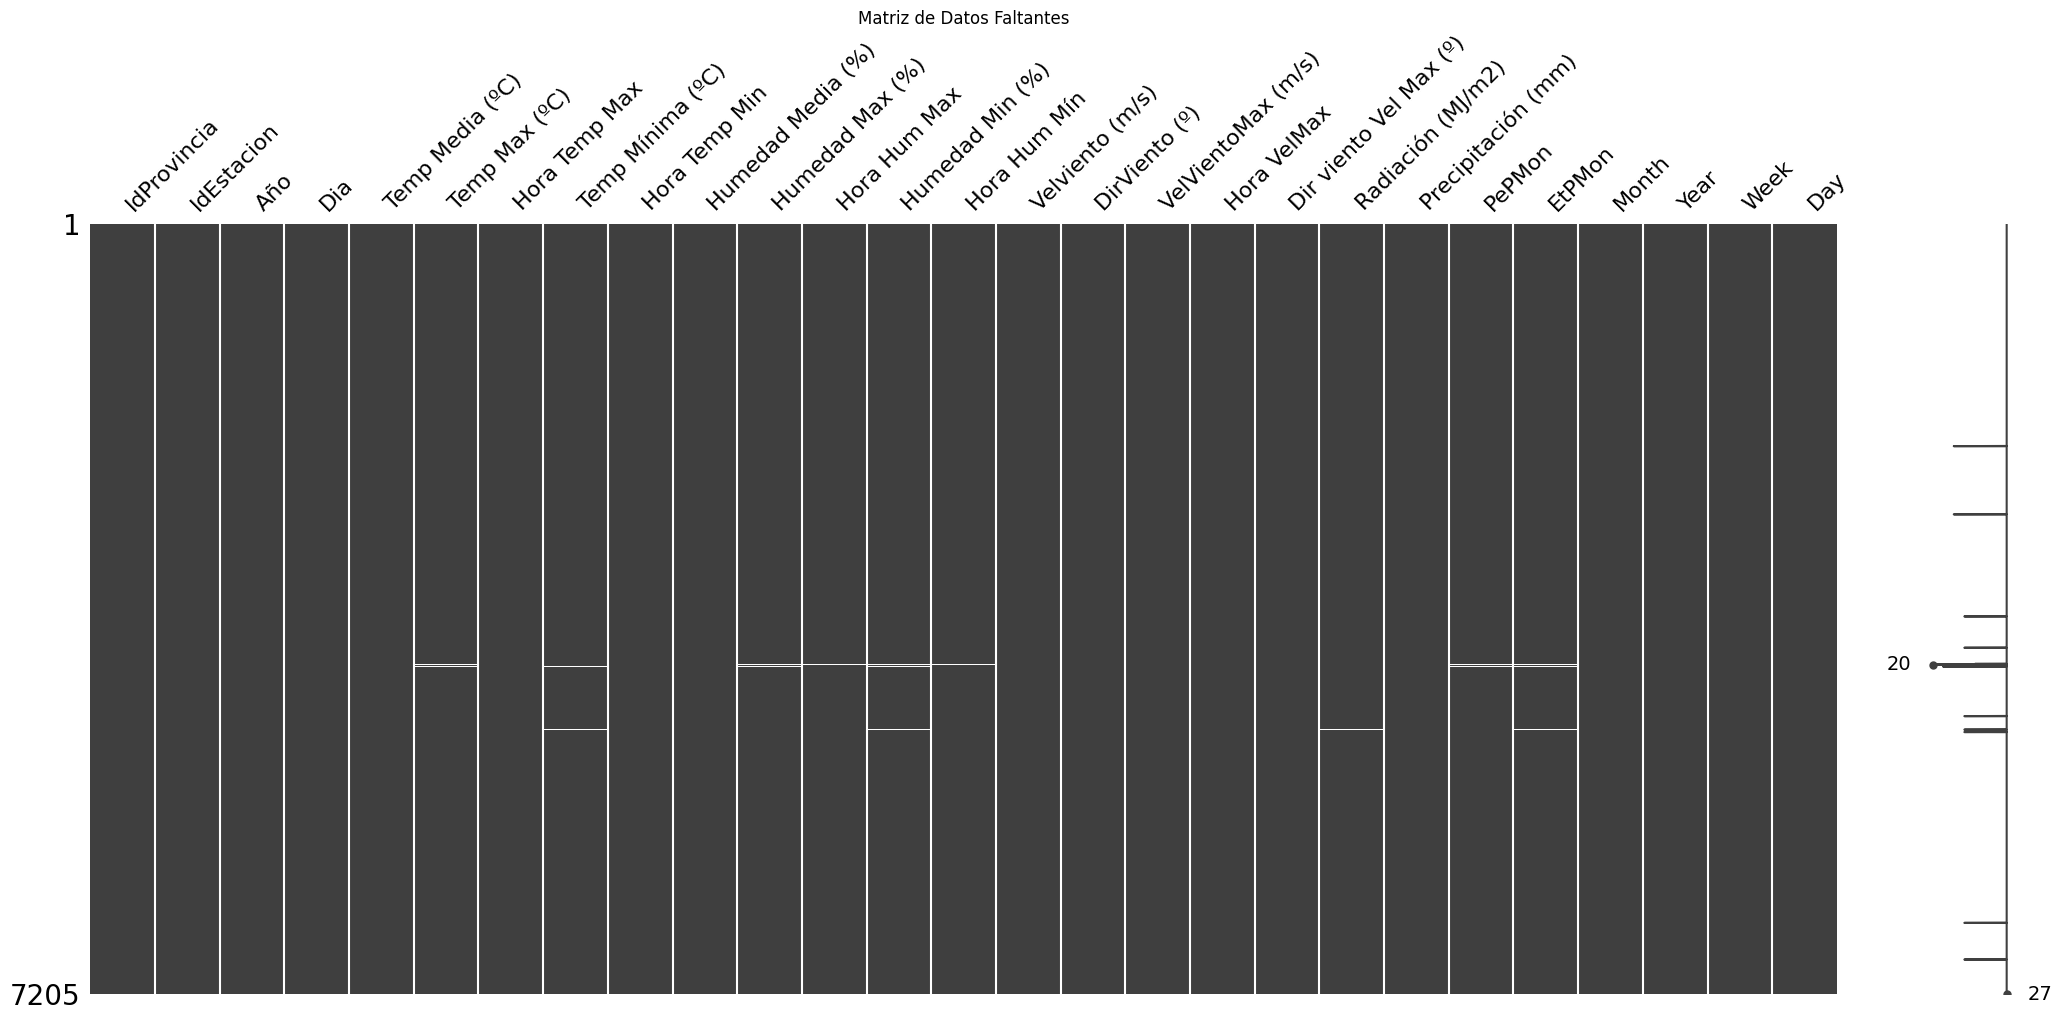

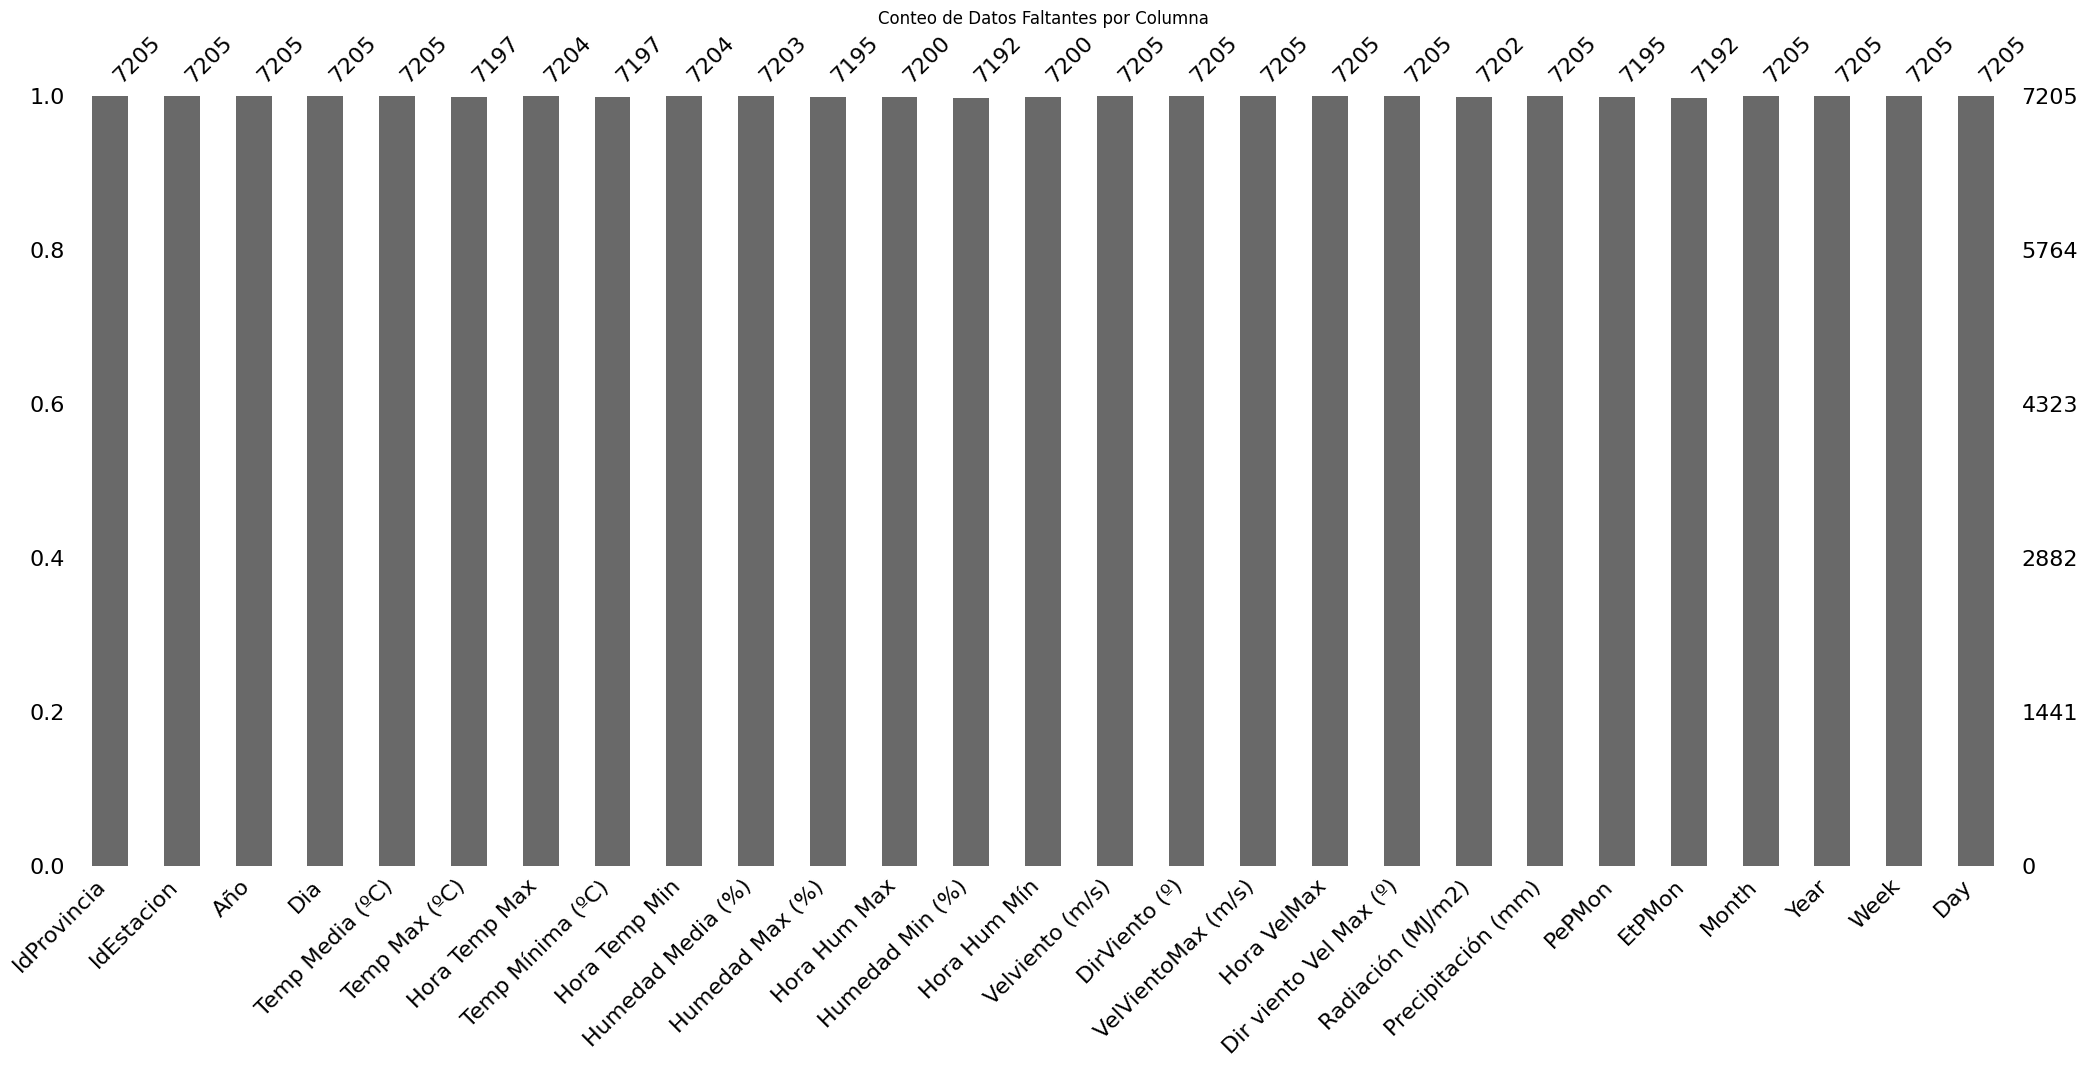

<Figure size 1200x600 with 0 Axes>

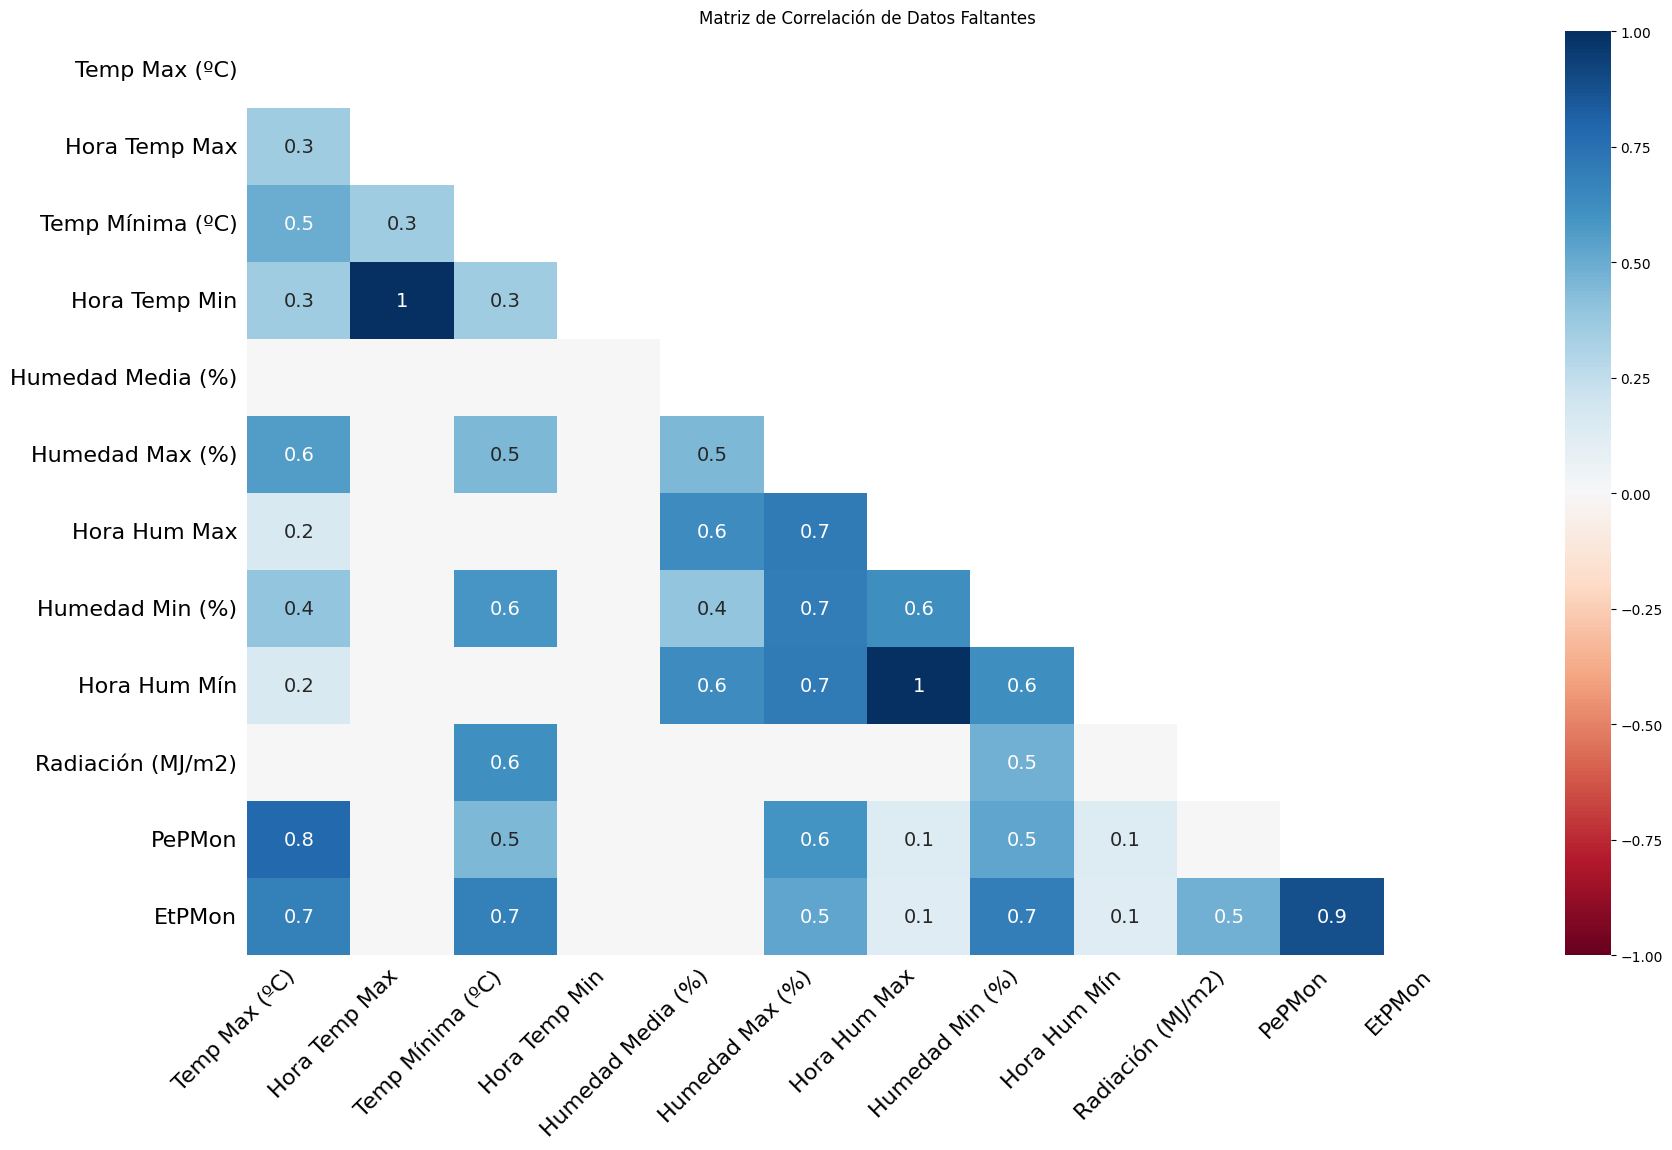

In [137]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualización de la matriz de datos faltantes
plt.figure(figsize=(12, 6))
msno.matrix(df_formateado)
plt.title('Matriz de Datos Faltantes')
plt.show()

# Visualización del gráfico de barras de datos faltantes
plt.figure(figsize=(12, 6))
msno.bar(df_formateado)
plt.title('Conteo de Datos Faltantes por Columna')
plt.show()

# Visualización de la matriz de correlación de datos faltantes
plt.figure(figsize=(12, 6))
msno.heatmap(df_formateado)
plt.title('Matriz de Correlación de Datos Faltantes')
plt.show()



In [144]:
df_formateado.dtypes



IdProvincia                 int64
IdEstacion                  int64
Año                         int64
Dia                         int64
Temp Media (ºC)           float64
Temp Max (ºC)             float64
Hora Temp Max              object
Temp Mínima (ºC)          float64
Hora Temp Min              object
Humedad Media (%)         float64
Humedad Max (%)           float64
Hora Hum Max               object
Humedad Min (%)           float64
Hora Hum Mín               object
Velviento (m/s)           float64
DirViento (º)             float64
VelVientoMax (m/s)        float64
Hora VelMax                object
Dir viento Vel Max (º)     object
Radiación (MJ/m2)         float64
Precipitación (mm)        float64
PePMon                    float64
EtPMon                    float64
Month                       int32
Year                        int32
Week                       UInt32
Day                         int32
dtype: object

C:\Users\Pablo\AppData\Local\Temp\ipykernel_8464\2474005472.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df_numericas.resample('M').mean()


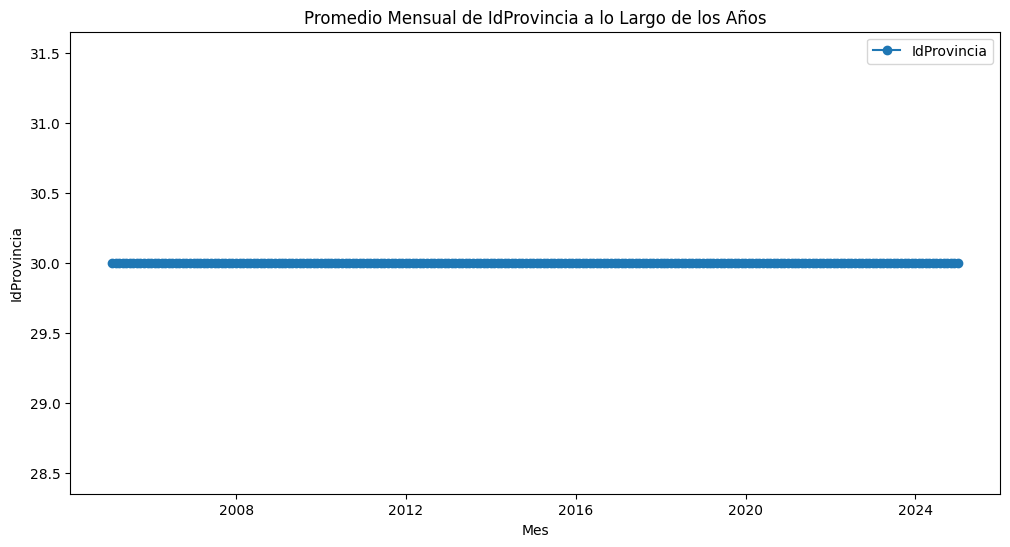

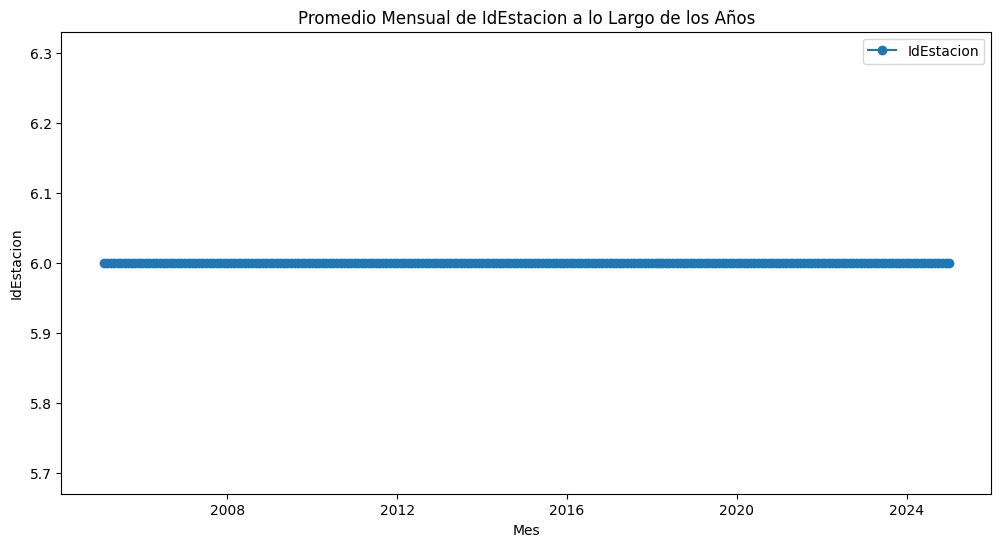

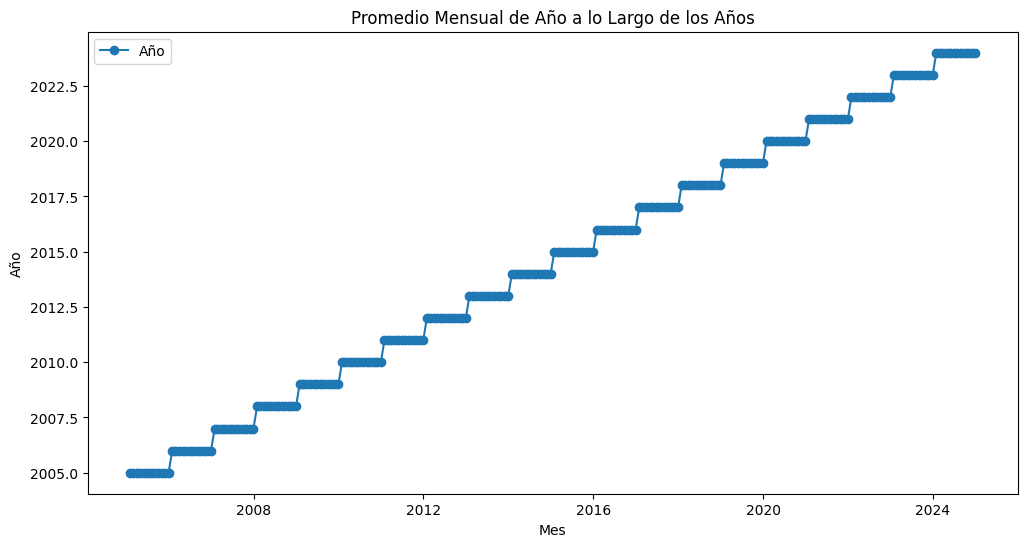

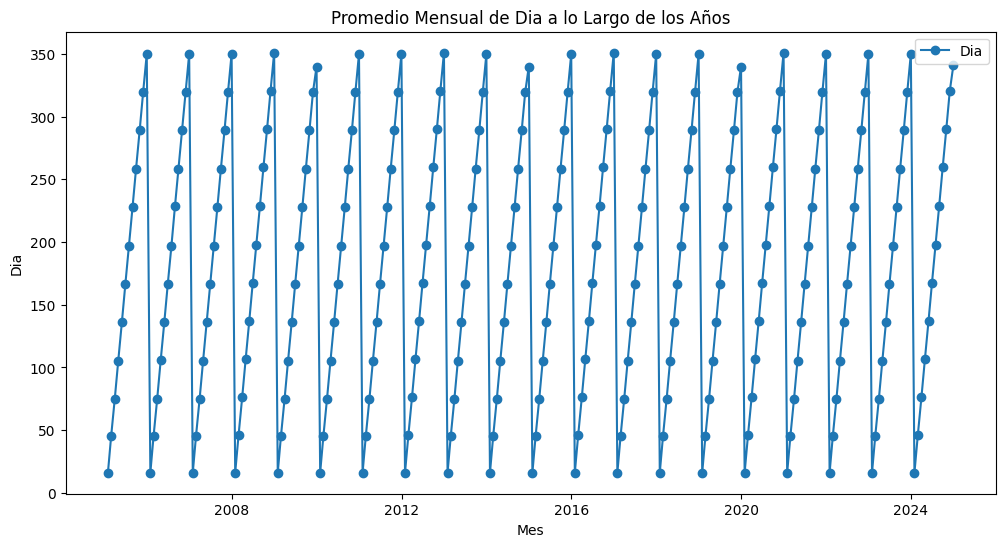

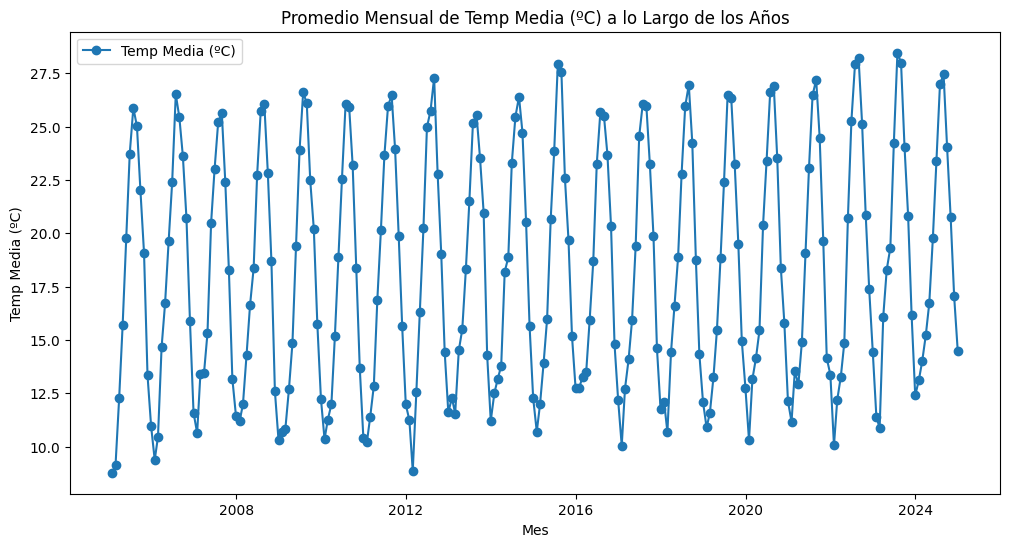

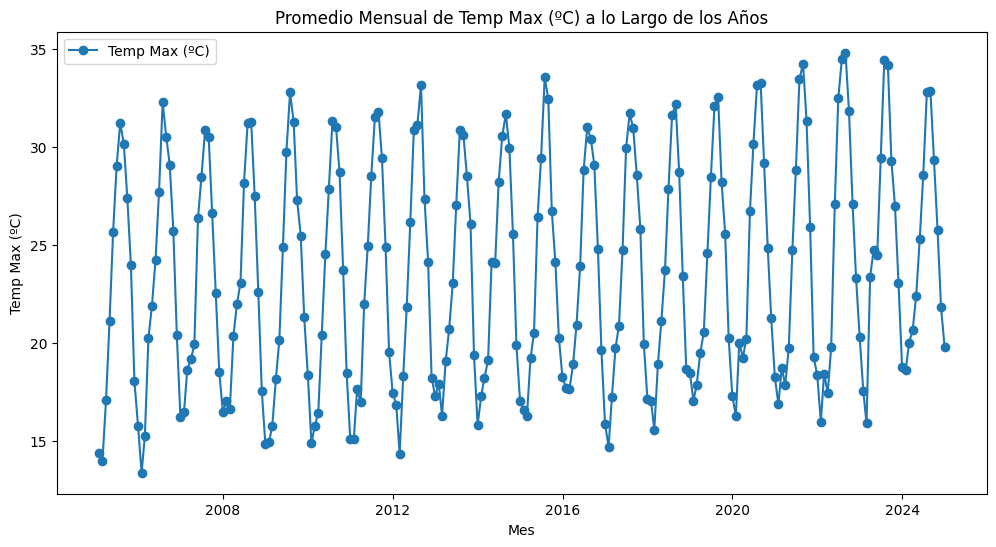

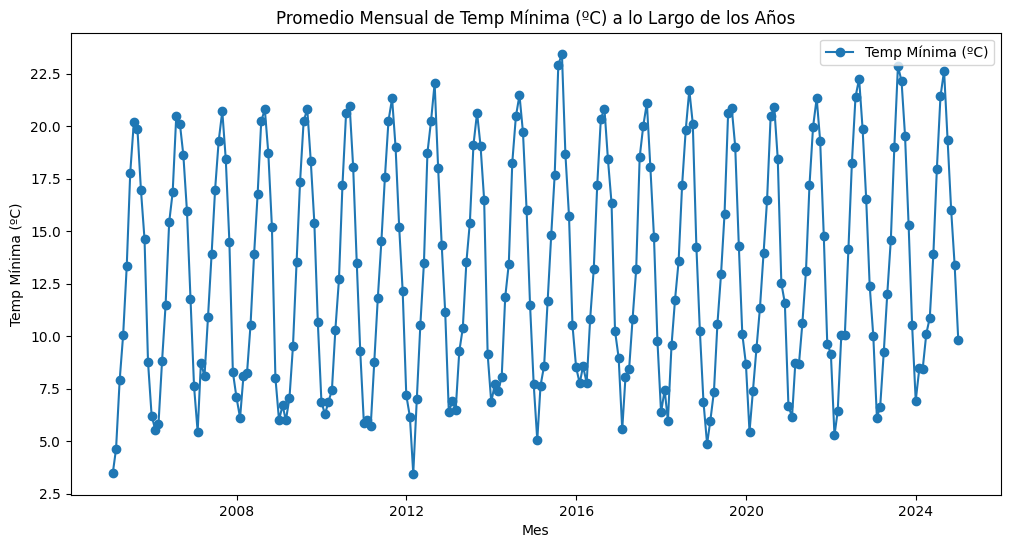

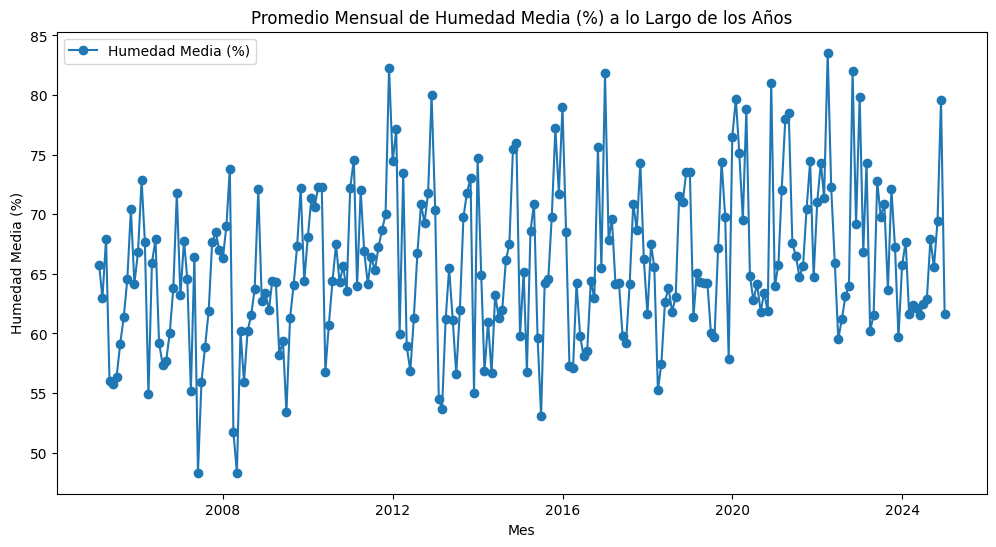

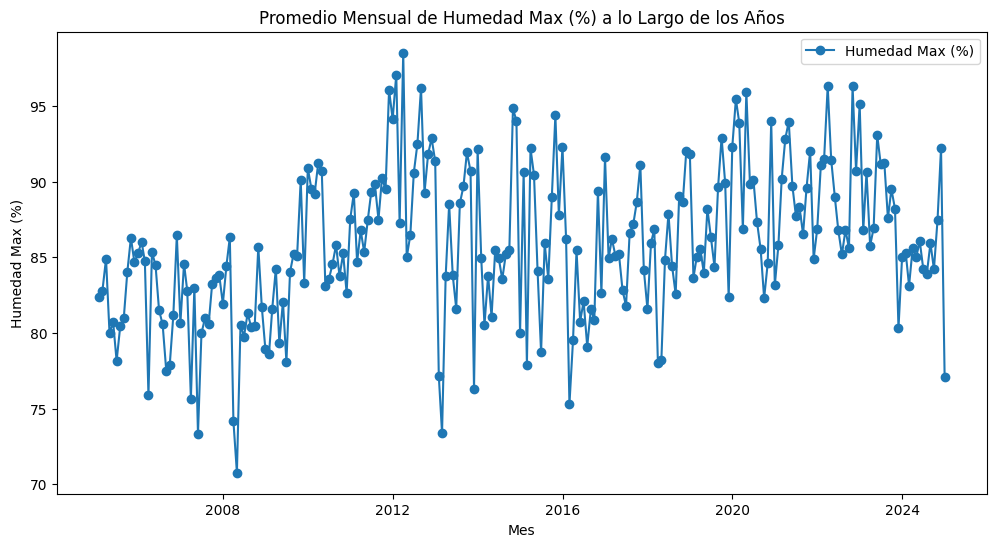

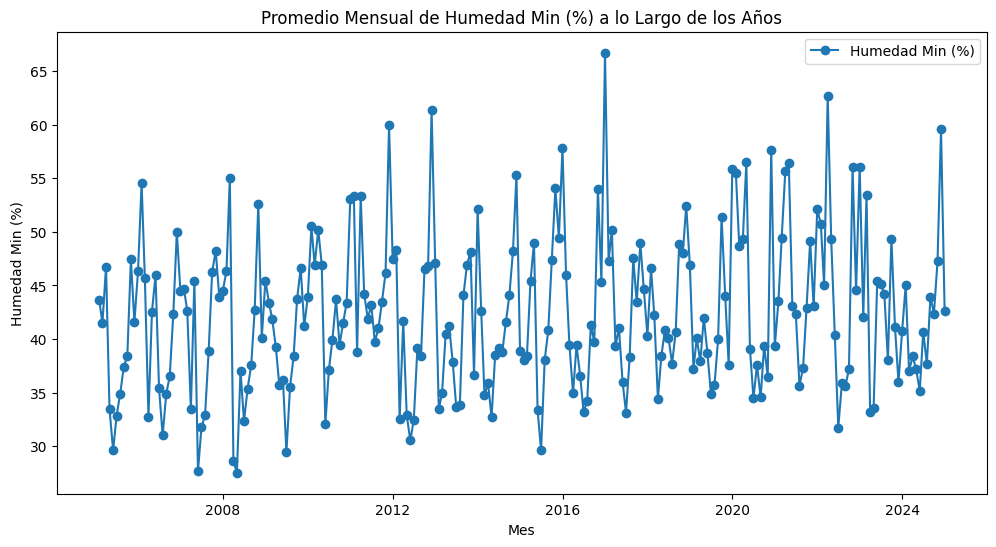

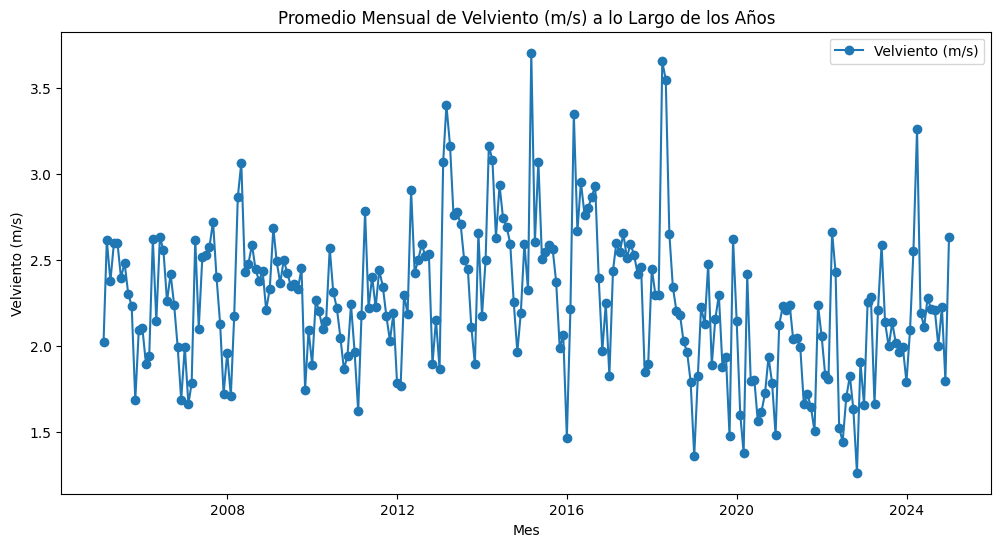

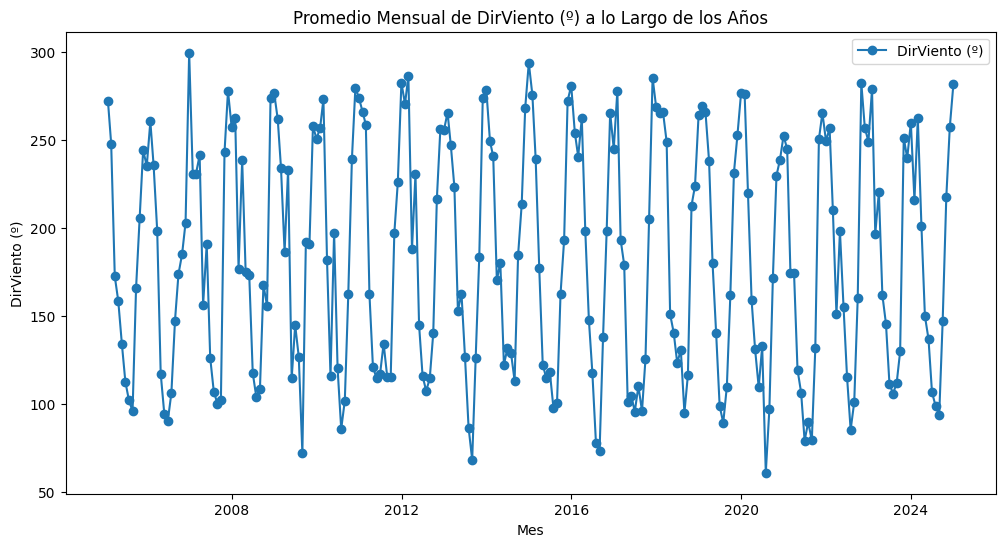

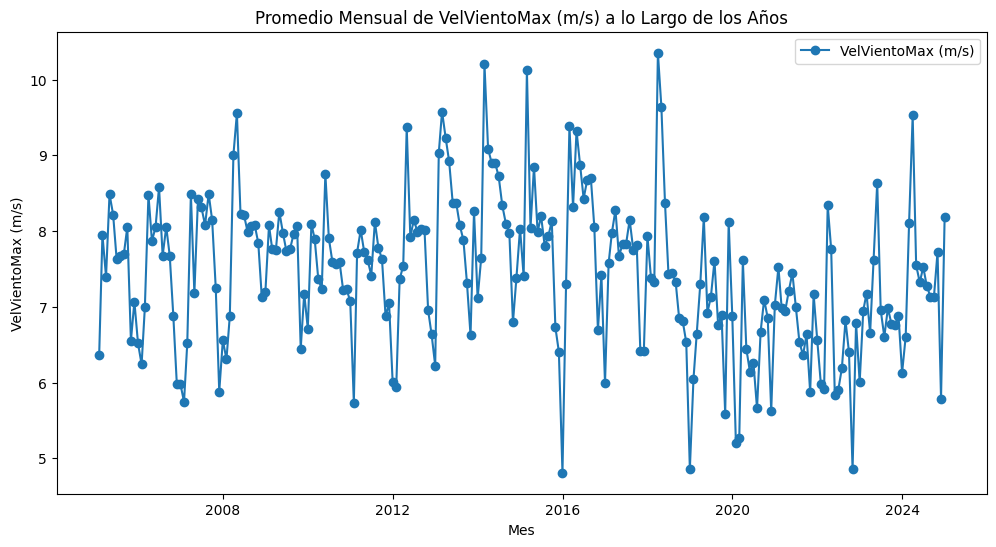

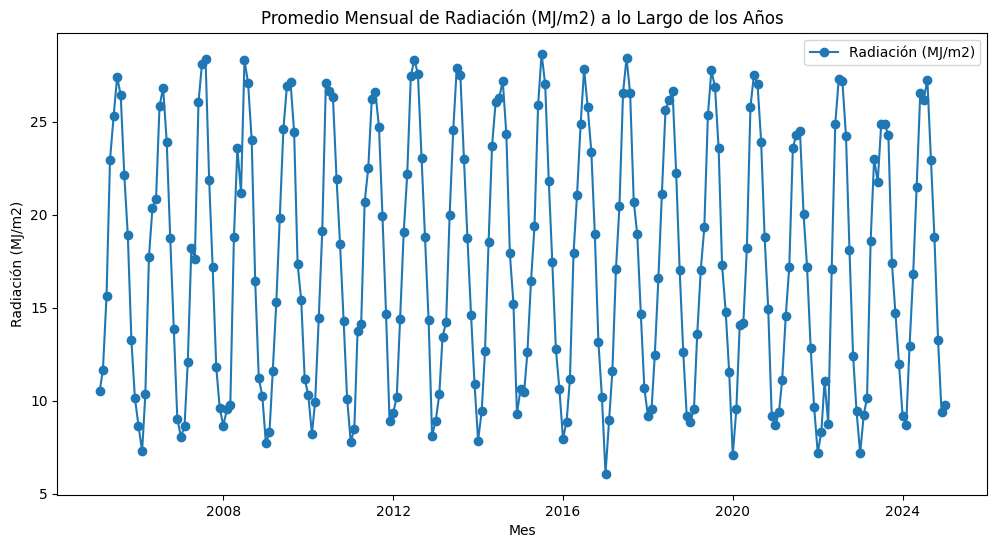

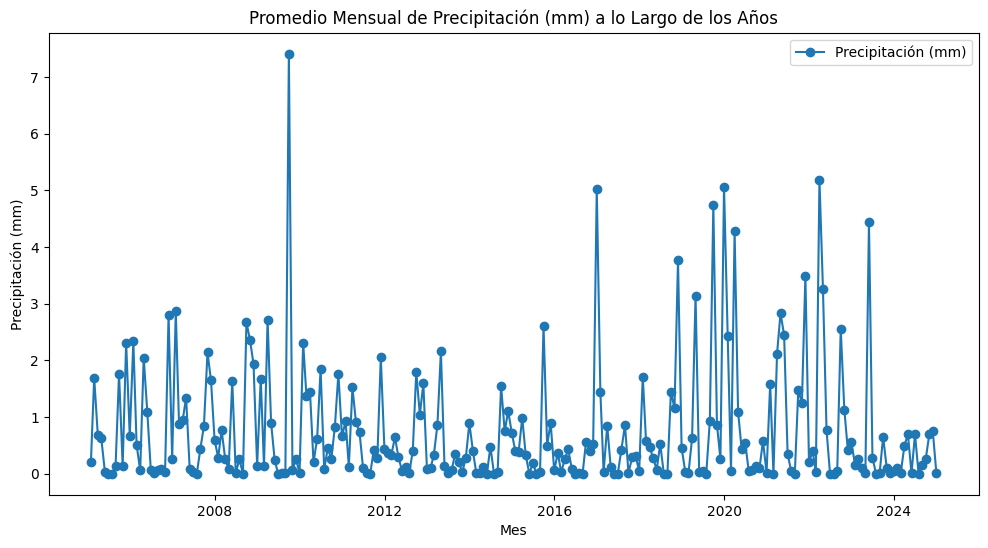

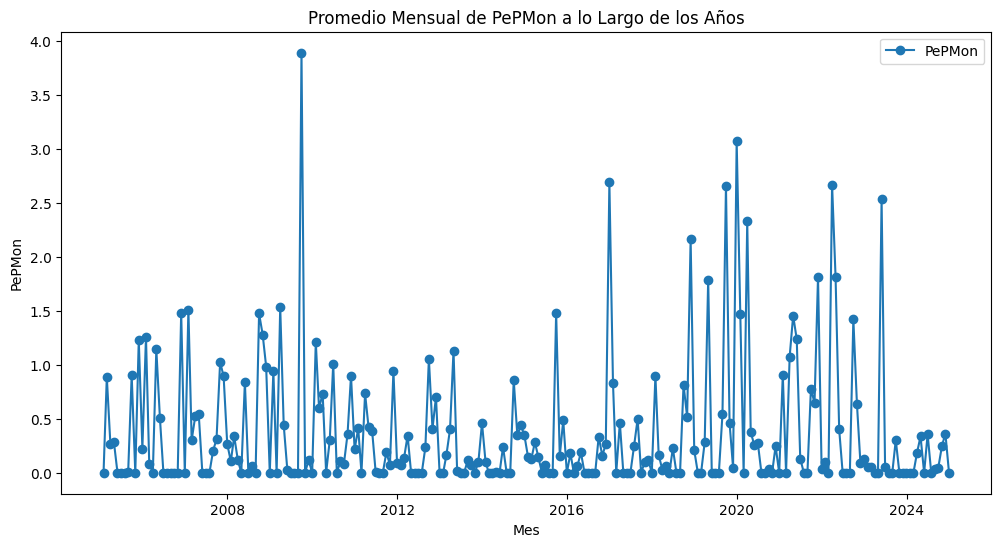

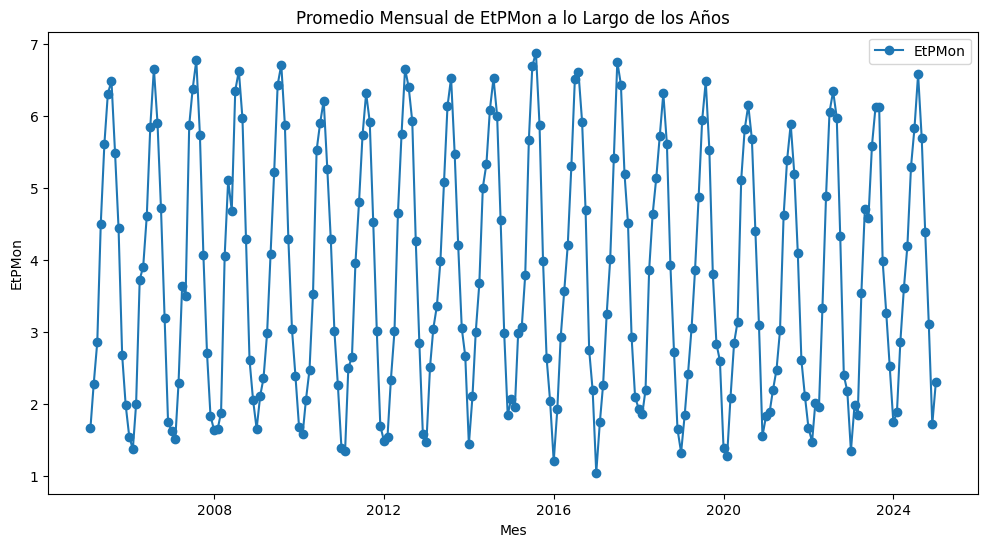

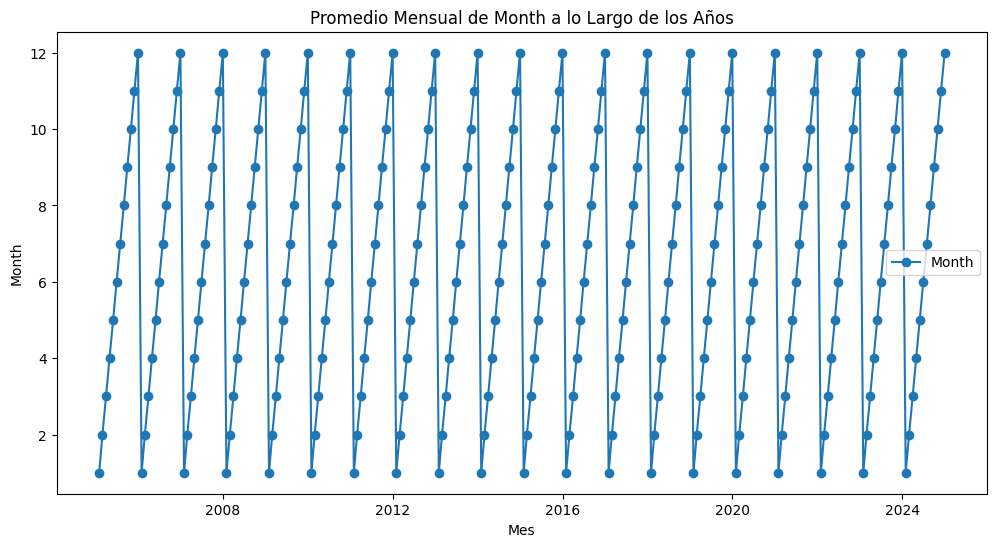

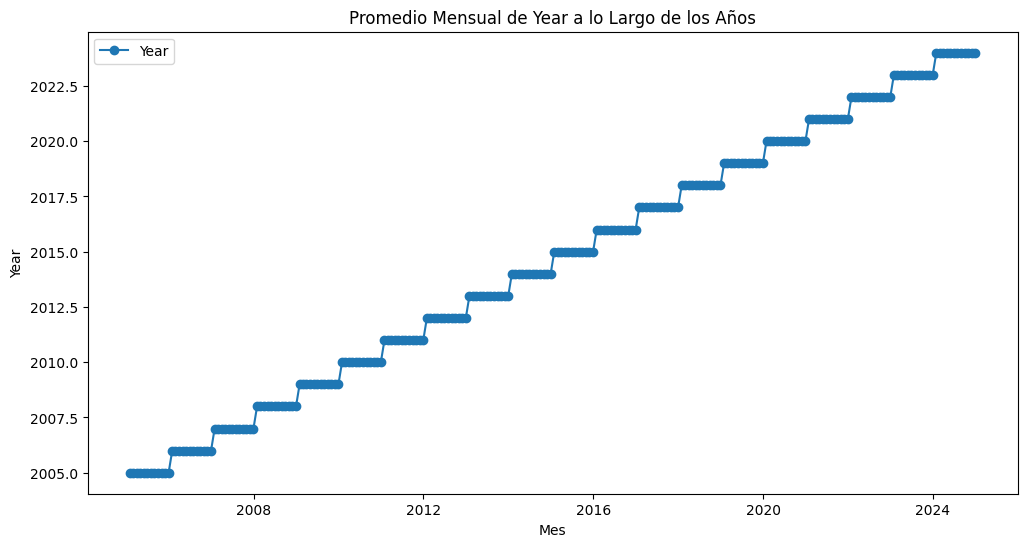

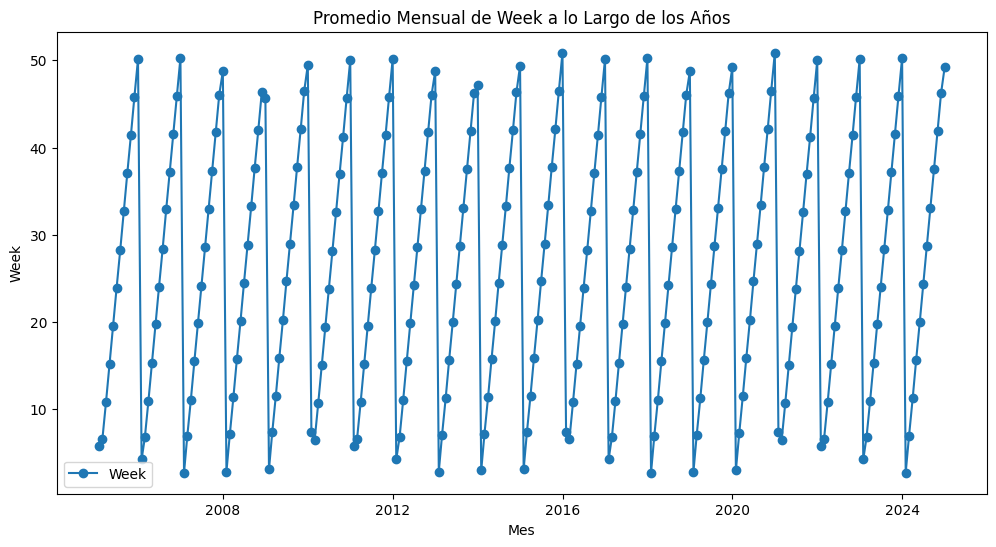

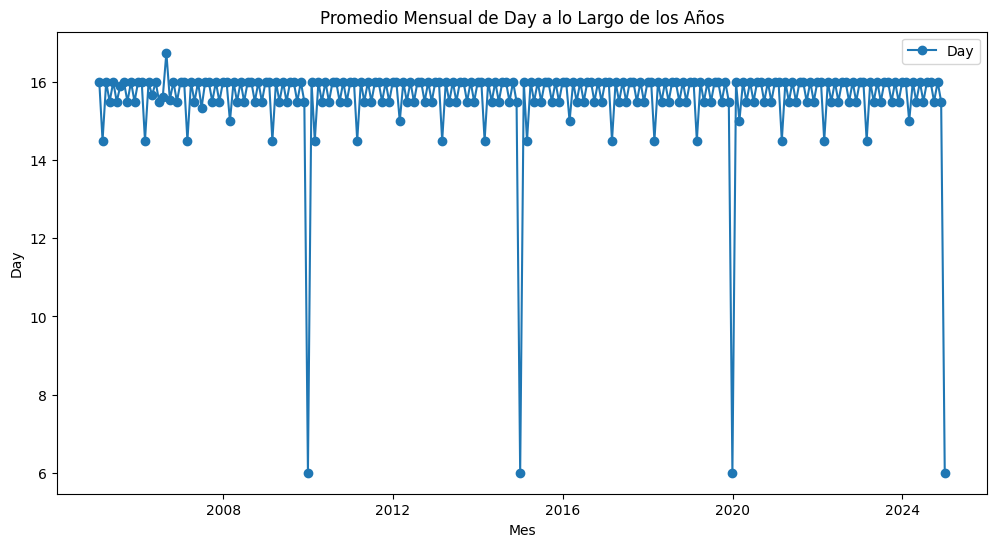

In [154]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumimos que df_formateado ya ha sido definido y contiene tus datos

# Convertir 'Fecha' a formato datetime y establecerla como índice
df_formateado['Fecha'] = pd.to_datetime(df_formateado.index, format='%Y-%m-%d')

# Seleccionar solo las columnas numéricas
df_numericas = df_formateado.select_dtypes(include=['number'])

# Agrupar por año y mes y calcular el promedio de cada variable numérica
monthly_avg = df_numericas.resample('M').mean()

# Crear gráficos de cada variable numérica
for variable in df_numericas.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_avg.index, monthly_avg[variable], marker='o', linestyle='-', label=variable)
    plt.title(f'Promedio Mensual de {variable} a lo Largo de los Años')
    plt.xlabel('Mes')
    plt.ylabel(variable)
    plt.legend()
    plt.show()


In [155]:
# Calcular la temperatura media anual
annual_temp_avg = df_formateado.groupby(df_formateado.index.year)['Temp Media (ºC)'].mean()

# Mostrar las temperaturas medias anuales
print(annual_temp_avg)


Fecha
2005    17.168104
2006    17.744611
2007    17.724038
2008    17.636284
2009    18.359652
2010    17.358603
2011    18.291370
2012    17.956366
2013    17.908712
2014    19.140435
2015    18.618575
2016    18.312896
2017    18.220849
2018    18.198986
2019    18.322493
2020    18.365519
2021    18.362575
2022    19.239671
2023    19.228110
2024    19.724133
Name: Temp Media (ºC), dtype: float64


In [156]:
from scipy.stats import f_oneway

# Crear una lista de temperaturas medias para cada año
temperatures_by_year = [df_formateado[df_formateado.index.year == year]['Temp Media (ºC)'].dropna() for year in df_formateado.index.year.unique()]

# Realizar el ANOVA de una vía
anova_result = f_oneway(*temperatures_by_year)

# Mostrar los resultados del ANOVA
print(f"Estadístico F: {anova_result.statistic}")
print(f"Valor p: {anova_result.pvalue}")


Estadístico F: 4.418748052427868
Valor p: 4.477838860541097e-10


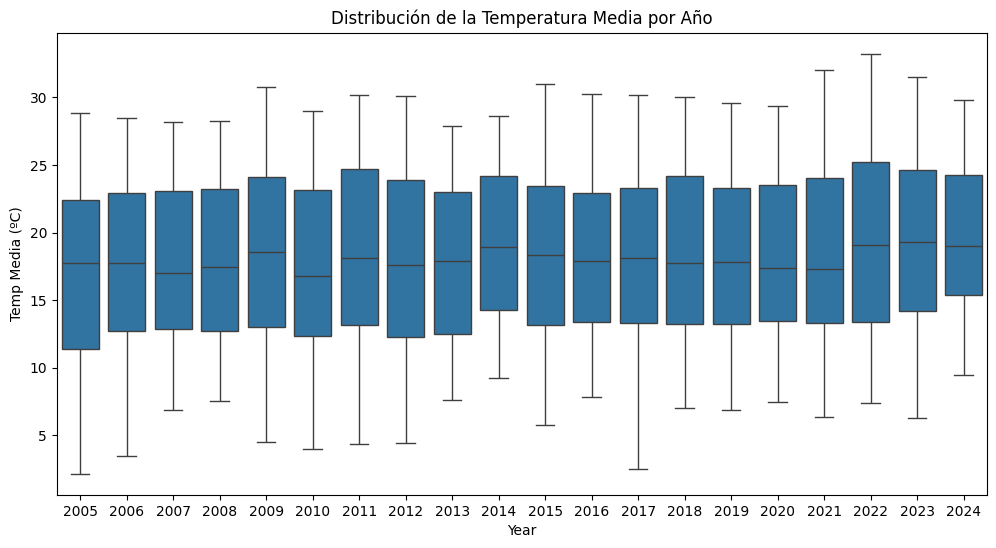

In [157]:
import seaborn as sns

# Crear un DataFrame para las temperaturas medias por año
df_temp_by_year = df_formateado[['Temp Media (ºC)']].copy()
df_temp_by_year['Year'] = df_temp_by_year.index.year

# Crear un boxplot de las temperaturas medias por año
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Temp Media (ºC)', data=df_temp_by_year)
plt.title('Distribución de la Temperatura Media por Año')
plt.show()
